# Sentiment Analysis on Healthcare Reviews

This notebook documents the process of performing sentiment analysis on healthcare-related reviews obtained from Google Maps. The dataset consists of reviews collected from various healthcare facilities, and the goal is to analyze the sentiment expressed in these reviews.

In [3]:
import pandas as pd
import emoji
import geopy
from geopy.geocoders import Nominatim

# Function to load and merge JSON files
def load_and_merge_json_files(num_files):
    dataframes = []
    for i in range(1, num_files + 1):
        file_path = f'../data/dataset_google-maps-reviews-{i}.json'
        df = pd.read_json(file_path)
        dataframes.append(df)
    merged_df = pd.concat(dataframes, ignore_index=True)
    return merged_df

# Load and merge the datasets
merged_data = load_and_merge_json_files(46)
merged_data.head()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6268 non-null   object
 1   stars         6268 non-null   int64 
 2   name          5555 non-null   object
 3   text          3809 non-null   object
 4   neighborhood  5575 non-null   object
 5   location      6107 non-null   object
 6   categoryName  6268 non-null   object
 7   city          6203 non-null   object
 8   publishAt     6268 non-null   object
 9   isLocalGuide  161 non-null    object
dtypes: int64(1), object(9)
memory usage: 489.8+ KB


## Data Cleaning

In this section, we will perform data cleaning on the merged dataset. This includes handling missing values, duplicates, removing emojis, and updating the neighborhood field using the location field.

In [4]:
## Attach neightborhood as online for online health services

def online_neightborhood(row):
    if row['title'] == "HomeRx | Online Pharmacy in Abuja":
        return "Online"
    return row['neighborhood']

merged_data['neighborhood'] = merged_data.apply(online_neightborhood, axis=1)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6268 non-null   object
 1   stars         6268 non-null   int64 
 2   name          5555 non-null   object
 3   text          3809 non-null   object
 4   neighborhood  5640 non-null   object
 5   location      6107 non-null   object
 6   categoryName  6268 non-null   object
 7   city          6203 non-null   object
 8   publishAt     6268 non-null   object
 9   isLocalGuide  161 non-null    object
dtypes: int64(1), object(9)
memory usage: 489.8+ KB


In [5]:
## Update missing rows city data to Abuja
def update_missing_city(city):
    if pd.isnull(city):
        return "Abuja"
    return city

merged_data['city'] = merged_data['city'].apply(update_missing_city)

merged_data.info()

merged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6268 non-null   object
 1   stars         6268 non-null   int64 
 2   name          5555 non-null   object
 3   text          3809 non-null   object
 4   neighborhood  5640 non-null   object
 5   location      6107 non-null   object
 6   categoryName  6268 non-null   object
 7   city          6268 non-null   object
 8   publishAt     6268 non-null   object
 9   isLocalGuide  161 non-null    object
dtypes: int64(1), object(9)
memory usage: 489.8+ KB


,title,stars,name,text,neighborhood,location,categoryName,city,publishAt,isLocalGuide
0,Nisa Premier Hospital,5,Oluwaseun Timothy,Nisa Premier Hospital's brand is indeed a lead...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,7 hours ago,NaN
1,Nisa Premier Hospital,5,Taiwo Astro,Excellent healthcare,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,3 days ago,NaN
2,Nisa Premier Hospital,1,Emmanuel Isaac,They refused to make payments easy for custome...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a week ago,NaN
3,Nisa Premier Hospital,1,Idy Zubair,I tried Nisa premier services a couple of time...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,2 weeks ago,NaN
4,Nisa Premier Hospital,1,Iyo Obie,"My experience today, Sat 18th Jan 2025, left a...",Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a month ago,NaN
...,...,...,...,...,...,...,...,...,...,...
6263,Kelina Hospital Abuja,4,Kelechi Kenneth,About to have the experience,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,8 years ago,NaN
6264,Kelina Hospital Abuja,5,Bubem OBINOBI Jo,Awesome...I got to my destination on time.,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,9 years ago,NaN
6265,Kelina Hospital Abuja,4,Felix Gbinda Wono (Daintybingz),None,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,9 years ago,NaN
6266,Kelina Hospital Abuja,5,Oluwakemi Omolara Ojo,Thank you for your video on facebook it as bee...,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,9 years ago,NaN


In [6]:
## display health facility with missing neighborhood field

missing = []
def display_missing_neighborhood(row):
    if pd.isnull(row['neighborhood']):
        if row.title not in missing:
            missing.append(row.title)

merged_data.apply(display_missing_neighborhood, axis=1)

missing

['Vinca Hospital',
 'Kubwa General Hospital',
 'Bwari General Hospital, Bwari, Abuja, FCT',
 'Nizamiye Hospital',
 'Queen Specialist Hospital',
 'Army Command and NAOWA Hospital']

In [7]:
## Update missing neighborhood data for health facilities

def update_missing_neighborhood(row):
    if pd.isnull(row['neighborhood']):
        if row.title == "Vinca Hospital":
            return "Kubwa"
        elif row.title == "Kubwa General Hospital":
            return "Kubwa"
        elif row.title == "Bwari General Hospital, Bwari, Abuja, FCT":
            return "Bwari"
        elif row.title == "Nizamiye Hospital":
            return "Life Camp"
        elif row.title == "Queen Specialist Hospital":
            return "Apo"
        elif row.title == "Army Command and NAOWA Hospital":
            return "Asokoro"
        return row['neighborhood']
    return row['neighborhood']

merged_data['neighborhood'] = merged_data.apply(update_missing_neighborhood, axis=1)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6268 non-null   object
 1   stars         6268 non-null   int64 
 2   name          5555 non-null   object
 3   text          3809 non-null   object
 4   neighborhood  6268 non-null   object
 5   location      6107 non-null   object
 6   categoryName  6268 non-null   object
 7   city          6268 non-null   object
 8   publishAt     6268 non-null   object
 9   isLocalGuide  161 non-null    object
dtypes: int64(1), object(9)
memory usage: 489.8+ KB


In [8]:
def change_to_pharm(categoryName):
    if categoryName == "Supermarket" or categoryName == "Shopping mall":
        return "Pharmacy"
    return categoryName
merged_data['categoryName'] = merged_data['categoryName'].apply(change_to_pharm)


In [9]:
# Function to remove emojis from text if present
def remove_emojis(text): 
    return emoji.replace_emoji(text, replace='')

# Data cleaning steps
def clean_data(df):
    # Drop duplicates, excluding the 'location' field
    df = df.drop_duplicates(subset=[col for col in df.columns if col != 'location'])
    
    # Drop rows with null or empty text field
    df = df[df['text'].notnull() & df['text'].str.strip().astype(bool)]
    
    # Remove emojis from text field
    df['text'] = df['text'].apply(remove_emojis)
    
    # Drop rows with null or empty publishAt field
    df = df[df['publishAt'].notnull() & df['publishAt'].str.strip().astype(bool)]
    
    # Drop rows  with null rows or empty neighborhood field
    df = df[df['neighborhood'].notnull() & df['neighborhood'].str.strip().astype(bool)]
    
    return df

cleaned_data = clean_data(merged_data)
cleaned_data

,title,stars,name,text,neighborhood,location,categoryName,city,publishAt,isLocalGuide
0,Nisa Premier Hospital,5,Oluwaseun Timothy,Nisa Premier Hospital's brand is indeed a lead...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,7 hours ago,NaN
1,Nisa Premier Hospital,5,Taiwo Astro,Excellent healthcare,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,3 days ago,NaN
2,Nisa Premier Hospital,1,Emmanuel Isaac,They refused to make payments easy for custome...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a week ago,NaN
3,Nisa Premier Hospital,1,Idy Zubair,I tried Nisa premier services a couple of time...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,2 weeks ago,NaN
4,Nisa Premier Hospital,1,Iyo Obie,"My experience today, Sat 18th Jan 2025, left a...",Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a month ago,NaN
...,...,...,...,...,...,...,...,...,...,...
6259,Kelina Hospital Abuja,5,Bash Yusuf,A very good hospital. Very polite and professi...,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,7 years ago,NaN
6260,Kelina Hospital Abuja,4,Chidi Okorro,"Good and polite nurses, wonderful environment",Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,7 years ago,NaN
6263,Kelina Hospital Abuja,4,Kelechi Kenneth,About to have the experience,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,8 years ago,NaN
6264,Kelina Hospital Abuja,5,Bubem OBINOBI Jo,Awesome...I got to my destination on time.,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,9 years ago,NaN


## Next Steps

After cleaning the data, we will proceed to perform sentiment analysis on the cleaned dataset.

In [10]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

c:\Users\user-pc\Desktop\python\sentiment-healthcare\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [11]:
# Function to get sentiment label and score
def get_sentiment(text):
    truncated_text = text[:512]  # Truncate text to 512 characters
    result = sentiment_pipeline(truncated_text)[0]
    return result['label'], result['score']

# Apply the sentiment analysis pipeline to the 'text' field
cleaned_data[['sentiment', 'sentiment_score']] = cleaned_data['text'].apply(lambda x: pd.Series(get_sentiment(x)))

# Display the first few rows of the dataset with the sentiment analysis results
cleaned_data.head()

,title,stars,name,text,neighborhood,location,categoryName,city,publishAt,isLocalGuide,sentiment,sentiment_score
0,Nisa Premier Hospital,5,Oluwaseun Timothy,Nisa Premier Hospital's brand is indeed a lead...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,7 hours ago,NaN,POSITIVE,0.999444
1,Nisa Premier Hospital,5,Taiwo Astro,Excellent healthcare,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,3 days ago,NaN,POSITIVE,0.999840
2,Nisa Premier Hospital,1,Emmanuel Isaac,They refused to make payments easy for custome...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a week ago,NaN,NEGATIVE,0.997162
3,Nisa Premier Hospital,1,Idy Zubair,I tried Nisa premier services a couple of time...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,2 weeks ago,NaN,NEGATIVE,0.999353
4,Nisa Premier Hospital,1,Iyo Obie,"My experience today, Sat 18th Jan 2025, left a...",Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a month ago,NaN,NEGATIVE,0.999459


In [12]:
import re

# Function to categorize the publishAt field into time periods
def categorize_time_period(publish_at):
    if re.search(r'\bsecond\b', publish_at) or re.search(r'\bseconds\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\bminute\b', publish_at) or re.search(r'\bminutes\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\bhour\b', publish_at) or re.search(r'\bhours\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\bday\b', publish_at) or re.search(r'\bdays\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\bweek\b', publish_at) or re.search(r'\bweeks\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\bmonth\b', publish_at) or re.search(r'\bmonths\b', publish_at):
        return 'Less than a year ago'
    elif re.search(r'\byear\b', publish_at):
        return '1 year ago'
    elif re.search(r'\byears\b', publish_at):
        x = re.findall(r'\d+', publish_at)
        if x:
            years = int(x[0])
            if years < 5:
                return f'{years} years ago'
            else:
                return '5 years and above'
    return 'Unknown'

# Apply the function to the 'publishAt' field
cleaned_data['time_period'] = cleaned_data['publishAt'].apply(categorize_time_period)

# Display the first few rows of the dataset with the time period categorization
cleaned_data.head()

,title,stars,name,text,neighborhood,location,categoryName,city,publishAt,isLocalGuide,sentiment,sentiment_score,time_period
0,Nisa Premier Hospital,5,Oluwaseun Timothy,Nisa Premier Hospital's brand is indeed a lead...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,7 hours ago,NaN,POSITIVE,0.999444,Less than a year ago
1,Nisa Premier Hospital,5,Taiwo Astro,Excellent healthcare,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,3 days ago,NaN,POSITIVE,0.999840,Less than a year ago
2,Nisa Premier Hospital,1,Emmanuel Isaac,They refused to make payments easy for custome...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a week ago,NaN,NEGATIVE,0.997162,Less than a year ago
3,Nisa Premier Hospital,1,Idy Zubair,I tried Nisa premier services a couple of time...,Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,2 weeks ago,NaN,NEGATIVE,0.999353,Less than a year ago
4,Nisa Premier Hospital,1,Iyo Obie,"My experience today, Sat 18th Jan 2025, left a...",Jabi,"{'lat': 9.0676555, 'lng': 7.4115661}",Hospital,Abuja,a month ago,NaN,NEGATIVE,0.999459,Less than a year ago


## Next Step - Visualization

This section shows the required visulization on the sentiment analysis that was performed.

C:\Users\user-pc\AppData\Local\Temp\ipykernel_9908\742954819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=cleaned_data, palette='viridis')


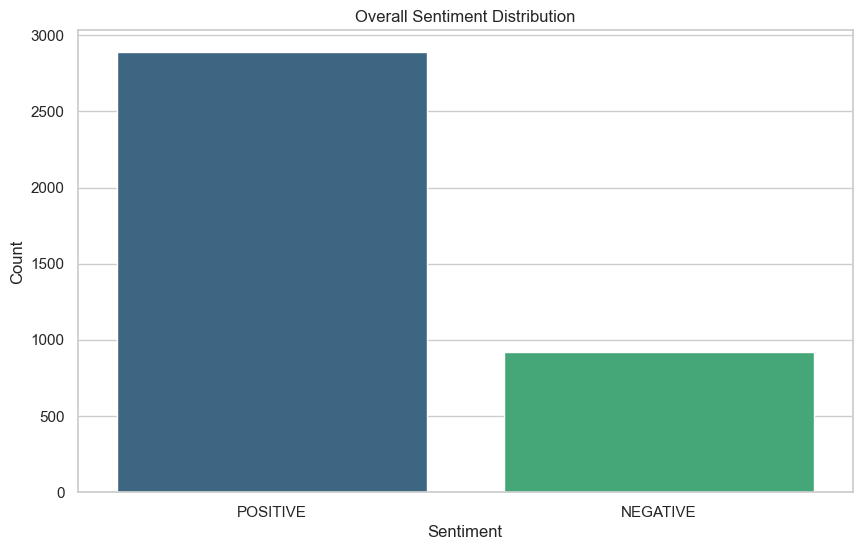

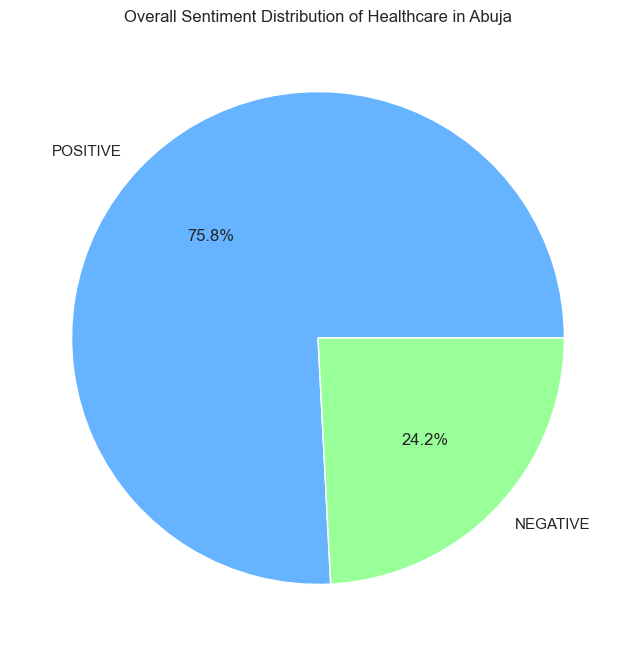

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_theme(style="whitegrid")

# Overall Sentiment Distribution - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=cleaned_data, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Overall Sentiment Distribution - Pie Chart
sentiment_counts = cleaned_data['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Overall Sentiment Distribution of Healthcare in Abuja')
plt.show()

In [14]:
# Define the order of the time periods
time_period_order = [
    '5 years and above',
    '4 years ago',
    '3 years ago',
    '2 years ago',
    '1 year ago',
    'Less than a year ago'
]

# Create a DataFrame with sentiment counts for each time period
sentiment_counts = cleaned_data.groupby(['time_period', 'sentiment']).size().unstack(fill_value=0).reset_index()

# Convert the 'time_period' column to a categorical type with the specified order
sentiment_counts['time_period'] = pd.Categorical(sentiment_counts['time_period'], categories=time_period_order, ordered=True)

# Sort the DataFrame by the 'time_period' column
sentiment_counts = sentiment_counts.sort_values('time_period').reset_index(drop=True)

# Display the sentiment counts DataFrame
sentiment_counts

sentiment,time_period,NEGATIVE,POSITIVE
0,5 years and above,208,764
1,4 years ago,74,247
2,3 years ago,147,439
3,2 years ago,173,530
4,1 year ago,150,481
5,Less than a year ago,169,427


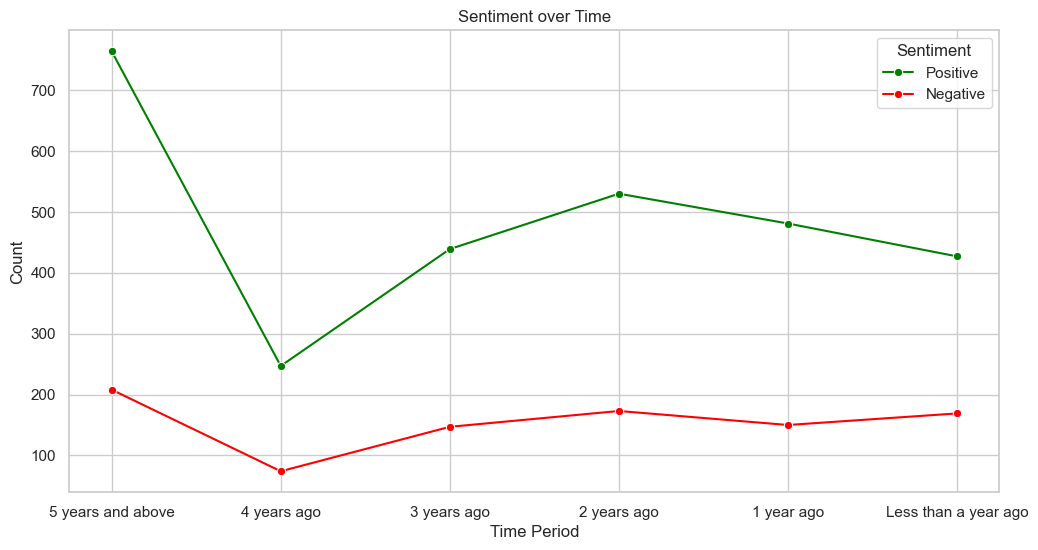

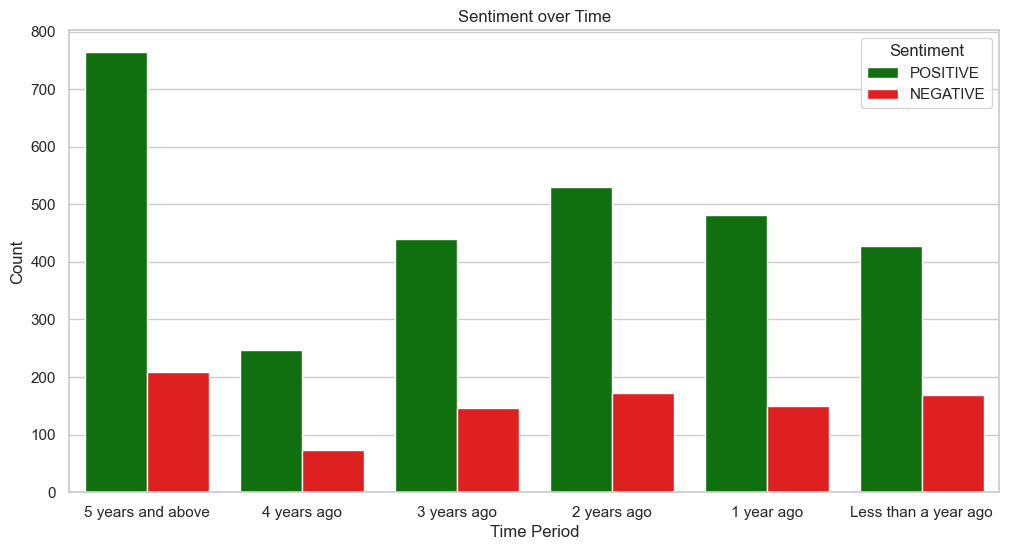

In [15]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Sentiment over Time - Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_period', y='POSITIVE', data=sentiment_counts, marker='o', label='Positive', color='green')
sns.lineplot(x='time_period', y='NEGATIVE', data=sentiment_counts, marker='o', label='Negative', color='red')
plt.title('Sentiment over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Sentiment over Time - Bar Chart
sentiment_counts_melted = sentiment_counts.melt(id_vars='time_period', value_vars=['POSITIVE', 'NEGATIVE'], var_name='sentiment', value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='time_period', y='count', hue='sentiment', data=sentiment_counts_melted, palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})
plt.title('Sentiment over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

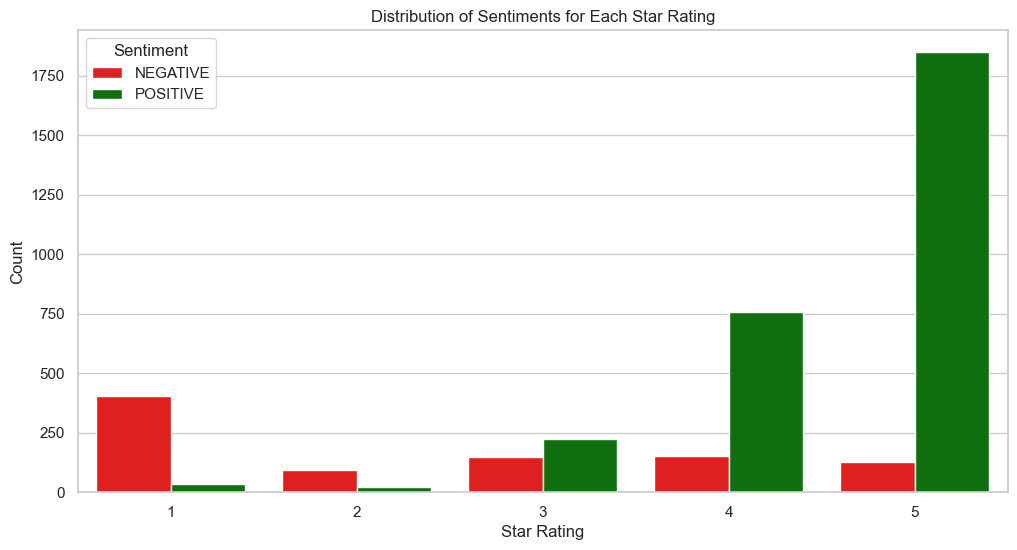

In [16]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Count Plot: Distribution of sentiments for each star rating
plt.figure(figsize=(12, 6))
sns.countplot(x='stars', hue='sentiment', data=cleaned_data, palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})
plt.title('Distribution of Sentiments for Each Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [17]:
# Create a DataFrame with sentiment counts for each category
category_sentiment_counts = cleaned_data.groupby(['categoryName', 'sentiment']).size().unstack(fill_value=0).reset_index()

# Display the category sentiment counts DataFrame
category_sentiment_counts

sentiment,categoryName,NEGATIVE,POSITIVE
0,General hospital,97,243
1,Hospital,480,1410
2,Medical Center,47,128
3,Medical clinic,8,11
4,Pharmacy,206,731
5,Private hospital,80,358
6,Specialized hospital,3,7


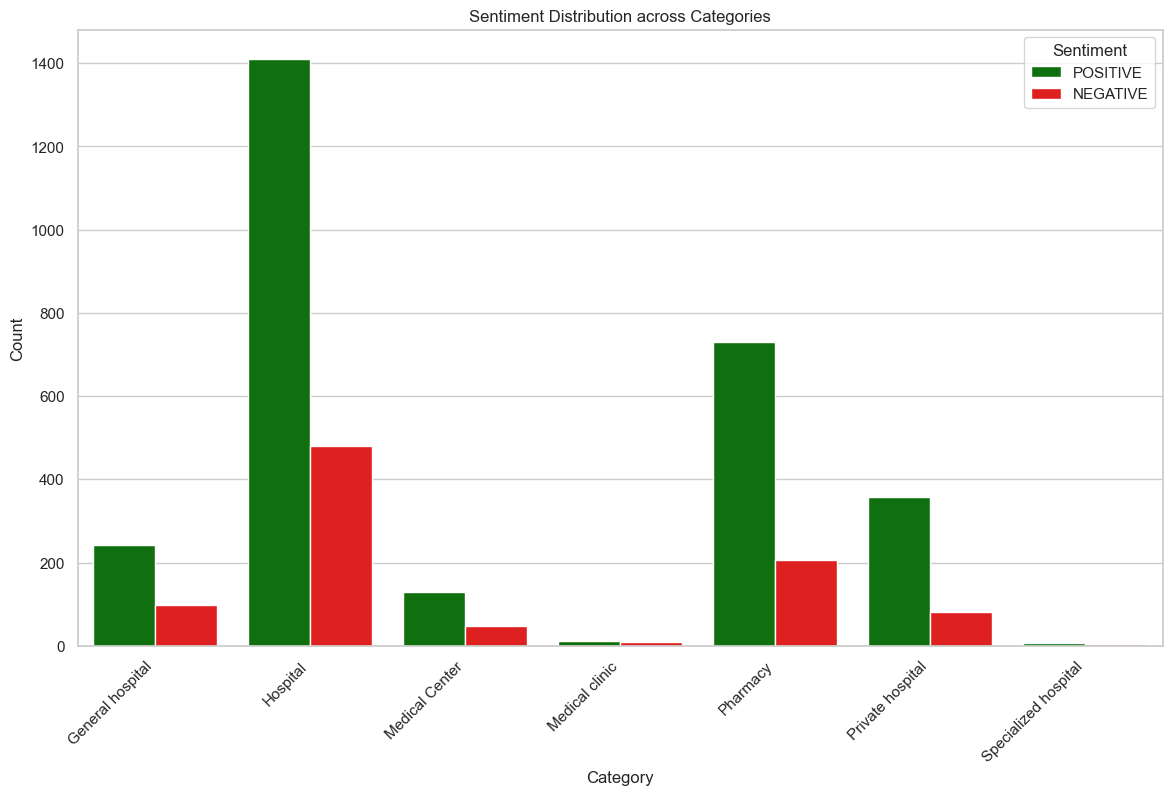

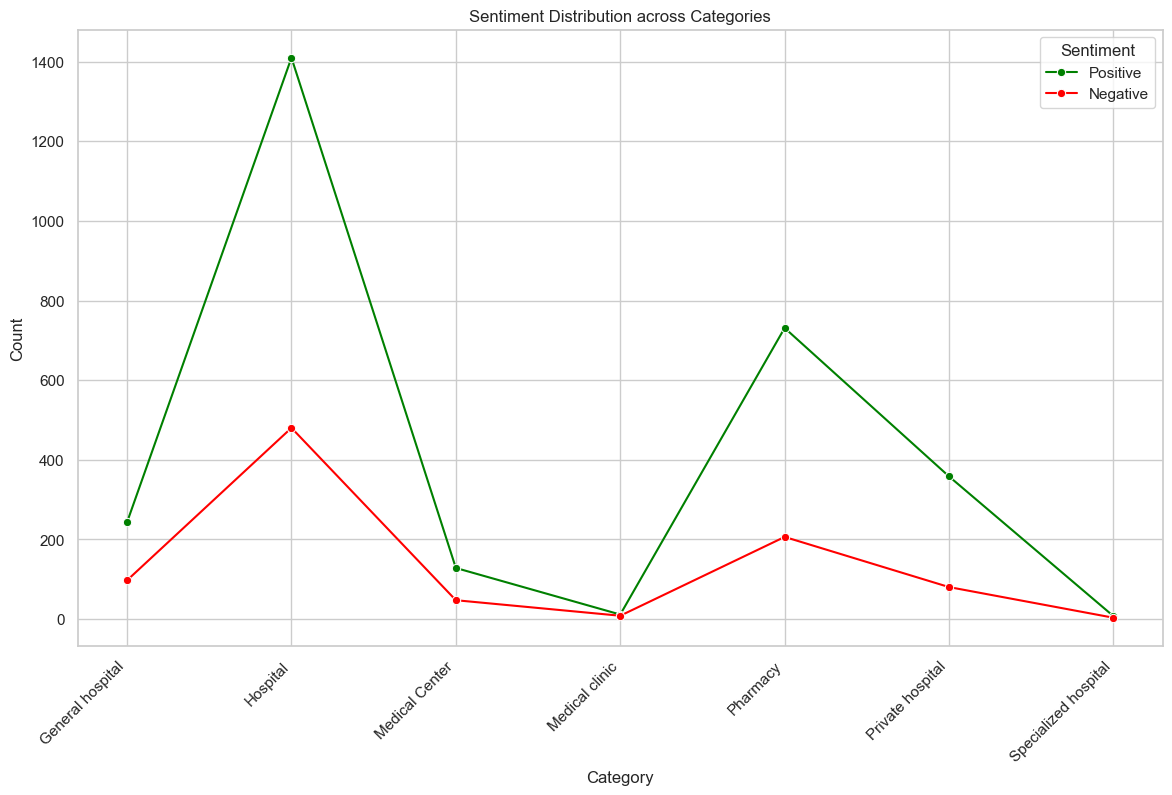

In [18]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Sentiment Distribution across Categories - Bar Chart
category_sentiment_counts_melted = category_sentiment_counts.melt(id_vars='categoryName', value_vars=['POSITIVE', 'NEGATIVE'], var_name='sentiment', value_name='count')
plt.figure(figsize=(14, 8))
sns.barplot(x='categoryName', y='count', hue='sentiment', data=category_sentiment_counts_melted, palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# Sentiment Distribution across Categories - Line Chart
plt.figure(figsize=(14, 8))
sns.lineplot(x='categoryName', y='POSITIVE', data=category_sentiment_counts, marker='o', label='Positive', color='green')
sns.lineplot(x='categoryName', y='NEGATIVE', data=category_sentiment_counts, marker='o', label='Negative', color='red')
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

In [19]:
# Create a DataFrame with sentiment counts for each category
neighborhood_sentiment_counts = cleaned_data.groupby(['neighborhood', 'sentiment']).size().unstack(fill_value=0).reset_index()

# Display the category sentiment counts DataFrame
neighborhood_sentiment_counts

sentiment,neighborhood,NEGATIVE,POSITIVE
0,Apo,72,189
1,Area 3,14,10
2,Asokoro,45,162
3,Bwari,8,32
4,Central Business Dis,93,249
5,FCT,0,65
6,Garki,89,233
7,Garki 2,8,31
8,Gudu,14,42
9,Gwarinpa,16,191


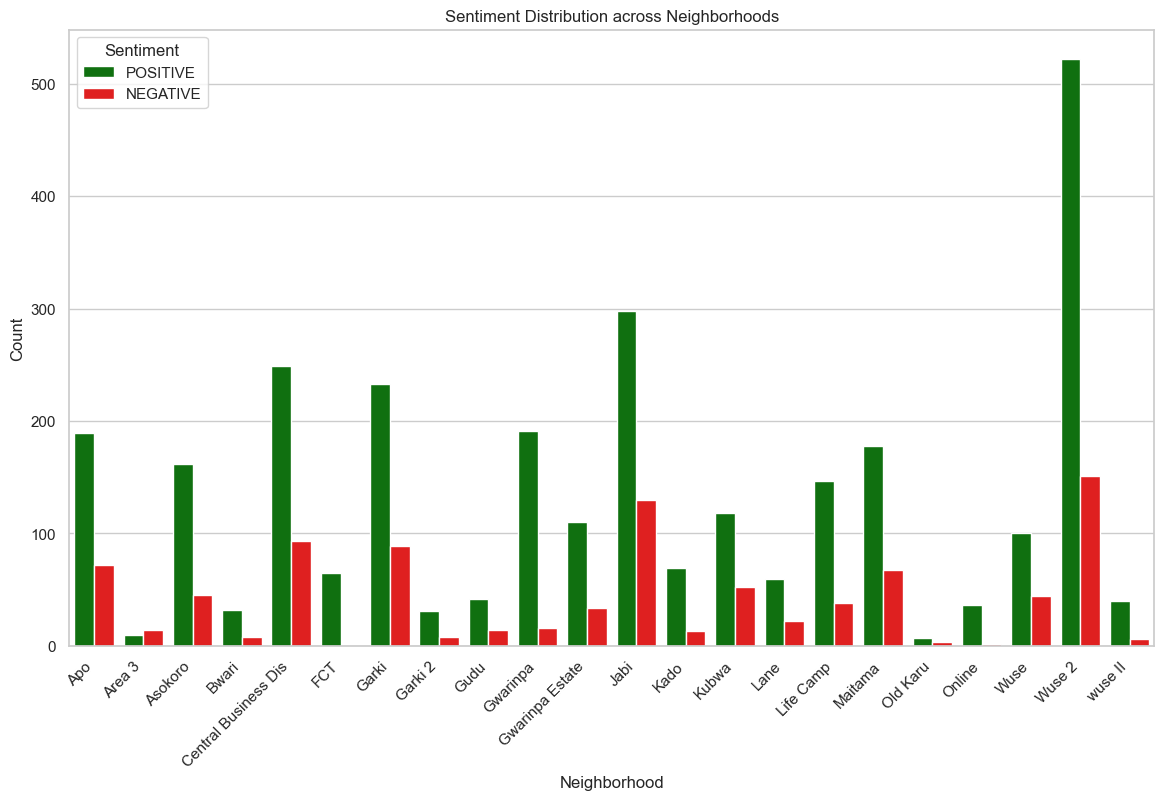

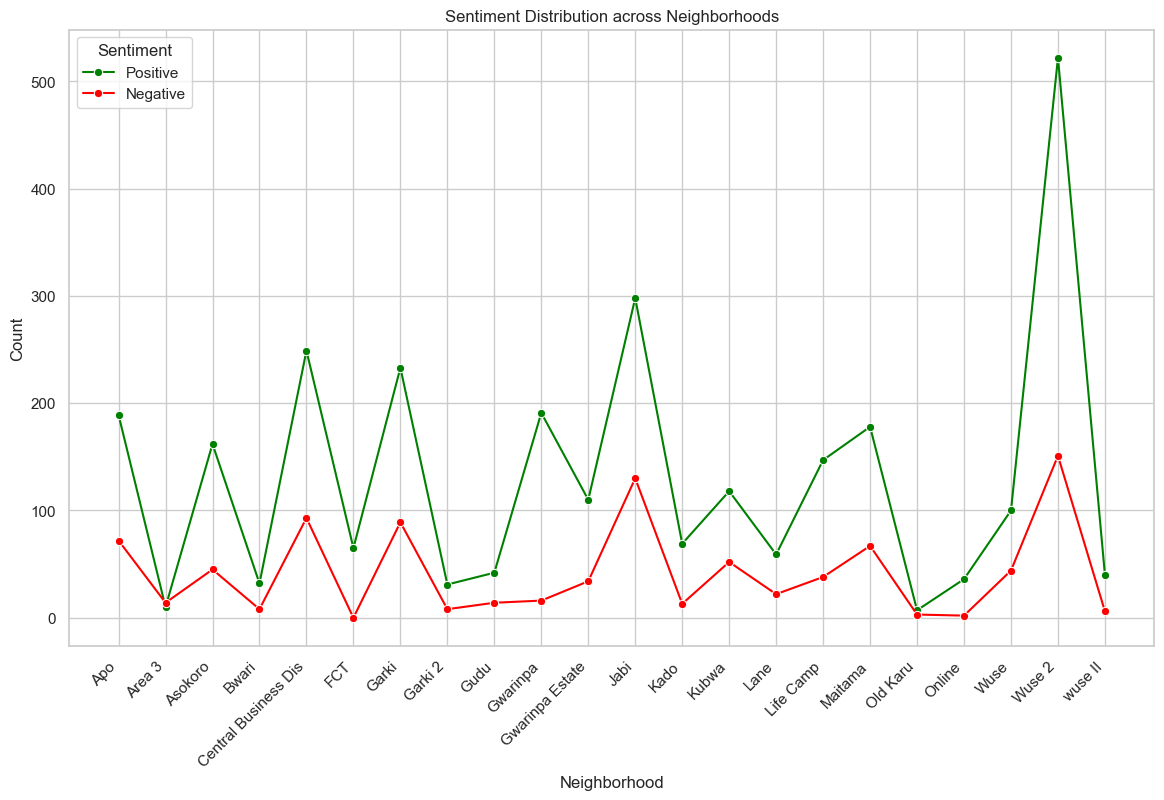

In [20]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# Sentiment Distribution across Neighborhoods - Bar Chart
neighborhood_sentiment_counts_melted = neighborhood_sentiment_counts.melt(id_vars='neighborhood', value_vars=['POSITIVE', 'NEGATIVE'], var_name='sentiment', value_name='count')
plt.figure(figsize=(14, 8))
sns.barplot(x='neighborhood', y='count', hue='sentiment', data=neighborhood_sentiment_counts_melted, palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})
plt.title('Sentiment Distribution across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# Sentiment Distribution across Neighborhoods - Line Chart
plt.figure(figsize=(14, 8))
sns.lineplot(x='neighborhood', y='POSITIVE', data=neighborhood_sentiment_counts, marker='o', label='Positive', color='green')
sns.lineplot(x='neighborhood', y='NEGATIVE', data=neighborhood_sentiment_counts, marker='o', label='Negative', color='red')
plt.title('Sentiment Distribution across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

## Performance Metrics

This section shows the performance metrics of the model used for analysis. 
it shows the Accurancy , Precision, Recall, F1 Score, Confusion Matrix and Classification Report

for a more a accurate metrics two approach will be used:
1. Rating as a proxy
2. Manual evaluation of a subset of the dataset.

In [21]:
df_metric = pd.read_csv('../file/cleaned_data.csv')

df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3809 non-null   object 
 1   stars            3809 non-null   int64  
 2   name             3334 non-null   object 
 3   text             3795 non-null   object 
 4   neighborhood     3809 non-null   object 
 5   location         3707 non-null   object 
 6   categoryName     3809 non-null   object 
 7   city             3809 non-null   object 
 8   publishAt        3809 non-null   object 
 9   isLocalGuide     102 non-null    object 
 10  sentiment        3809 non-null   object 
 11  sentiment_score  3809 non-null   float64
 12  time_period      3809 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 387.0+ KB


In [35]:
## Rating based performance metric

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Define sentiment based on ratings
def sentiment_from_rating(stars):
    if stars >= 4:
        return 'POSITIVE'
    elif stars <= 2:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'
    
df_metric['rating_sentiment'] = df_metric['stars'].apply(sentiment_from_rating)

# Filter out neutral ratings if not needed
df_metric = df_metric[df_metric['rating_sentiment'] != 'NEUTRAL']

# Calculate performance metrics
accuracy = accuracy_score(df_metric['rating_sentiment'], df_metric['sentiment'])
precision = precision_score(df_metric['rating_sentiment'], df_metric['sentiment'], pos_label='POSITIVE', average='binary')
recall = recall_score(df_metric['rating_sentiment'], df_metric['sentiment'], pos_label='POSITIVE', average='binary')
f1 = f1_score(df_metric['rating_sentiment'], df_metric['sentiment'], pos_label='POSITIVE', average='binary')
conf_matrix = confusion_matrix(df_metric['rating_sentiment'], df_metric['sentiment'])

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(df_metric['rating_sentiment'], df_metric['sentiment']))

Accuracy: 0.9031131800989235
Precision: 0.978971085242208
Recall: 0.9039528432732317
F1-Score: 0.9399675500270417
Confusion Matrix:
 [[ 497   56]
 [ 277 2607]]

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.64      0.90      0.75       553
    POSITIVE       0.98      0.90      0.94      2884

    accuracy                           0.90      3437
   macro avg       0.81      0.90      0.84      3437
weighted avg       0.92      0.90      0.91      3437



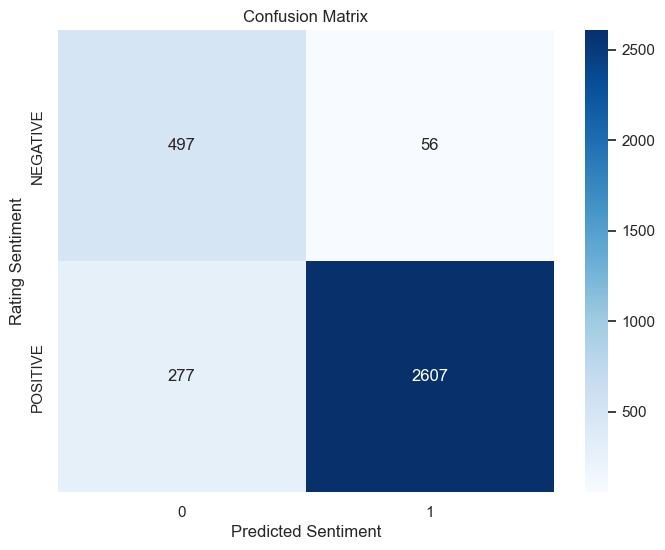

In [38]:
## Heatmap for confusion matrix on rating sentiment
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', yticklabels=['NEGATIVE', 'POSITIVE'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Rating Sentiment')
plt.show()

In [25]:
manual_validation_data = df_metric.sample(200, random_state=42)

manual_validation_data

,title,stars,name,text,neighborhood,location,categoryName,city,publishAt,isLocalGuide,sentiment,sentiment_score,time_period,rating_sentiment
1906,The Limi Hospital,5,Emmanuel Olugbile,I am proud to refer to Limi Hospital as the Ne...,Central Business Dis,"{'lat': 9.0431136, 'lng': 7.4685691}",Hospital,Abuja,4 years ago,NaN,POSITIVE,0.999601,4 years ago,POSITIVE
3802,Kelina Hospital Abuja,5,Nancy Nana,I so love Kelina Hospital...They are pretty go...,Gwarinpa,"{'lat': 9.1072619, 'lng': 7.404372}",Private hospital,Abuja,7 years ago,NaN,POSITIVE,0.999806,5 years and above,POSITIVE
1024,DIFF Medical Centre,5,NaN,Good hospital with awesome facilities,Gudu,"{'lat': 8.9924595, 'lng': 7.4740576}",Hospital,Abuja,3 years ago,NaN,POSITIVE,0.999849,3 years ago,POSITIVE
3311,Maitama District Hospital,5,Adebayo Samuel,this hospital is so amazing like the response ...,Maitama,NaN,General hospital,Abuja,3 years ago,True,POSITIVE,0.997595,3 years ago,POSITIVE
230,Wuse District Hospital,5,NaN,It was ok and nice hospital to go to,Wuse,"{'lat': 9.062914, 'lng': 7.4689032}",General hospital,Abuja,3 years ago,NaN,POSITIVE,0.999461,3 years ago,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,H-MEDIX pharmacy And Supermarket,4,Amaka Ann,Things are a bit cheaper compared to other sho...,Wuse 2,"{'lat': 9.0766639, 'lng': 7.4771109}",Pharmacy,Abuja,2 years ago,NaN,POSITIVE,0.994583,2 years ago,POSITIVE
2184,H-MEDIX pharmacy And Supermarket,4,KELECHI OGWO Ekpuike,Good pharmacy place,Wuse 2,"{'lat': 9.0766639, 'lng': 7.4771109}",Pharmacy,Abuja,2 years ago,NaN,POSITIVE,0.999824,2 years ago,POSITIVE
349,Cedarcrest Hospitals Ltd,1,NaN,Bring a mat or chess board. Took over 4 hours ...,Apo,"{'lat': 8.9927062, 'lng': 7.487031}",Private hospital,Abuja,2 years ago,NaN,NEGATIVE,0.990745,2 years ago,NEGATIVE
891,Vinca Hospital,5,Tony Mike,The hospital is very neat and well kept.\nThe ...,Kubwa,"{'lat': 9.159798200000001, 'lng': 7.3103963}",Hospital,Abuja,a year ago,NaN,POSITIVE,0.901314,1 year ago,POSITIVE


In [39]:
manual_validation_data = pd.read_csv('../file/manual_validation_data.csv')

# Filter out neutral ratings if not needed
manual_validation_data = manual_validation_data[manual_validation_data['true_sentiment'] != 'NETURAL']

# Calculate performance metrics
accuracy = accuracy_score(manual_validation_data['true_sentiment'], manual_validation_data['sentiment'])
precision = precision_score(manual_validation_data['true_sentiment'], manual_validation_data['sentiment'], pos_label='POSITIVE', average='binary')
recall = recall_score(manual_validation_data['true_sentiment'], manual_validation_data['sentiment'], pos_label='POSITIVE', average='binary')
f1 = f1_score(manual_validation_data['true_sentiment'], manual_validation_data['sentiment'], pos_label='POSITIVE', average='binary')
conf_matrix = confusion_matrix(manual_validation_data['true_sentiment'], manual_validation_data['sentiment'])

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(manual_validation_data['true_sentiment'], manual_validation_data['sentiment']))

Accuracy: 0.9695431472081218
Precision: 0.9754601226993865
Recall: 0.9875776397515528
F1-Score: 0.9814814814814815
Confusion Matrix:
 [[ 32   4]
 [  2 159]]

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.89      0.91        36
    POSITIVE       0.98      0.99      0.98       161

    accuracy                           0.97       197
   macro avg       0.96      0.94      0.95       197
weighted avg       0.97      0.97      0.97       197



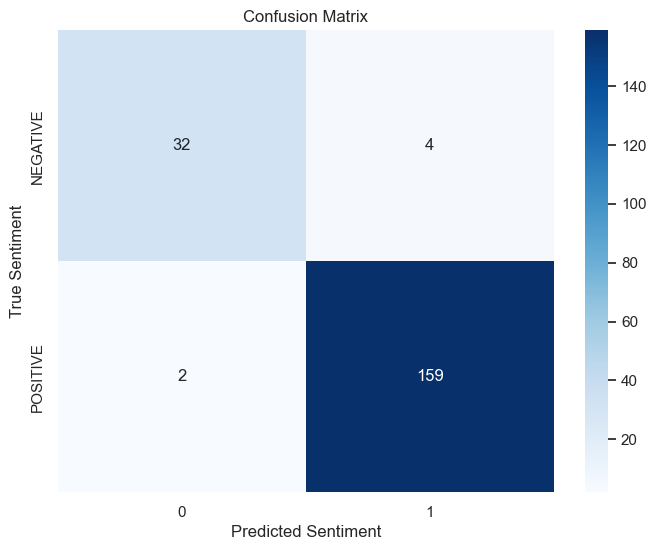

In [40]:
## Heatmap for confusion matrix on manual validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', yticklabels=['NEGATIVE', 'POSITIVE'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()